# Tarea 3
## *Visualización de Datos con Python*

In [10]:
#importamos librerias a usar
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

### Cargamos los datos procesados de la tarea anterior


In [11]:
df = pd.read_csv("surveys.csv")

## El Conjunto de Datos: Observaciones a Animales
Nuestro conjunto de datos contiene la especie, el sexo, el tamaño de pata en milimetros y peso en gramos de aves vistas en un sitio en particular en una fecha especifica.
Los registros datan desde el año 1977 hasta el año 2002.
Se describen 24 especies diferentes de aves en 24 areas diferentes.

**A partir de estos datos generaremos 5 graficos.**

### Grafico 1
Grafico de circulo para representar el porcentaje de especies avistadas en el año 1977

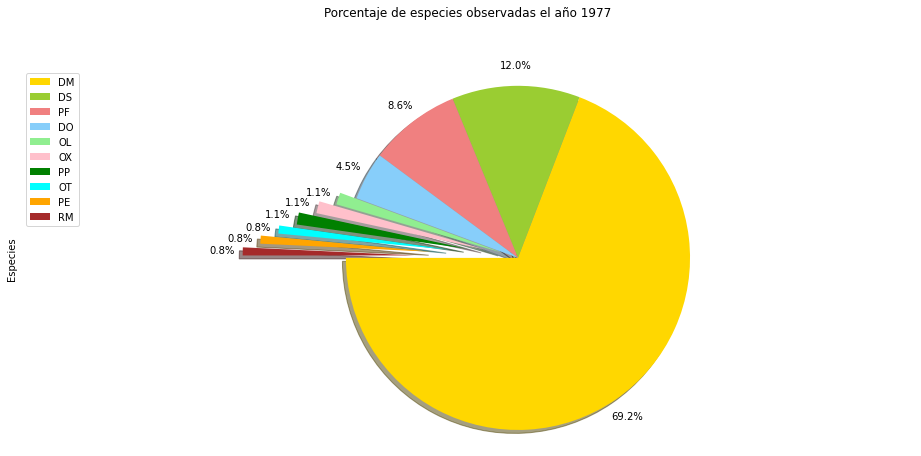

In [12]:
df_g1 = df[['year','species_id']]
df_g1 = df_g1[df_g1['year']==1977].value_counts().to_frame()
df_g1.columns = ['Especies']
df_g1 = df_g1.reset_index()
df_g1 = df_g1[['species_id','Especies']]
df_g1 = df_g1.set_index('species_id')
lista_colores = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','green','cyan','orange','brown']
lista_explotar = [0, 0, 0, 0, 0.1, 0.2,0.3,0.4,0.5,0.6] # relación para cada continente del inclinado de cada porción.
df_g1['Especies'].plot(kind='pie',
                            figsize=(16, 7),
                            autopct='%1.1f%%', 
                            startangle=180,    
                            shadow=True,       
                            labels=None,           # desactiva las etiquetas en el gráfico
                            pctdistance=1.12,      # relación entre el centro de cada sector circular y el inicio del texto generado por autopct 
                            colors=lista_colores,  # añadir colores personalizados
                            explode=lista_explotar # explotar los 3 continentes más bajos
                            )

# aumentar el título en un 12% para que coincida con pctdistance
plt.title('Porcentaje de especies observadas el año 1977', y=1.12) 

plt.axis('equal') 

# añadir leyenda
plt.legend(labels=df_g1.index, loc='upper left') 

plt.show()

In [13]:
df_aux = df[['year','species_id']]
condicion = ((df_aux['species_id'] == 'DM') | (df_aux['species_id'] == 'PP'))
df_l = df_aux[condicion].groupby('year')['species_id'].value_counts().to_frame()
df_l.columns = ['Avistamientos']
df_l.head(2)

Avistamientos
year species_id               
1977 DM                    184
     PP                      3

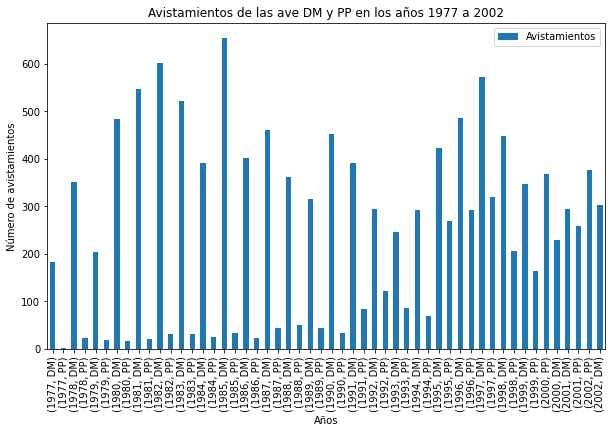

In [14]:
df_l.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Años') # agrega al gráfico la etiqueta del eje x
plt.ylabel('Número de avistamientos') # agrega al gráfico la etiqueta del eje y
plt.title('Avistamientos de las ave DM y PP en los años 1977 a 2002') # agrega al gráfico el título

plt.show()

### Grafico 2


### Grafico 3
Grafico de caja para representar la distribucion estadisdica de la especie mas frecuente entre los años 1977 y 2002

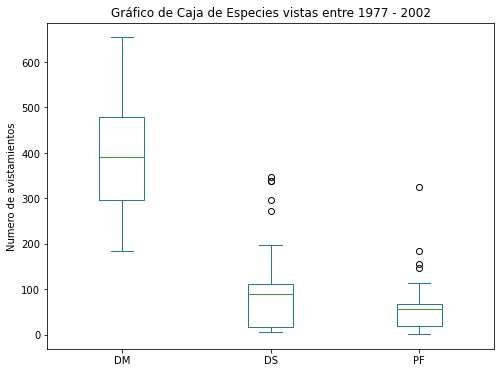

In [15]:
df_g3 = df[['year','species_id']]
df_g3_dm = df_g3[df_g3['species_id']=='DM']
df_g3_ds = df_g3[df_g3['species_id']=='DS']
df_g3_pf = df_g3[df_g3['species_id']=='PF']
df_g3_dm = df_g3_dm.value_counts().to_frame().reset_index()
df_g3_ds = df_g3_ds.value_counts().to_frame().reset_index()
df_g3_pf = df_g3_pf.value_counts().to_frame().reset_index()
df_g3_dm = df_g3_dm.set_index('year').drop('species_id',axis=1)
df_g3_ds = df_g3_ds.set_index('year').drop('species_id',axis=1)
df_g3_pf = df_g3_pf.set_index('year').drop('species_id',axis=1)
df_g3_dm.columns = ['DM']
df_g3_ds.columns = ['DS']
df_g3_pf.columns = ['PF']
df_g3_dm.insert(1,'DS',df_g3_ds['DS'])
df_g3_dm.insert(2,'PF',df_g3_pf['PF'])
df_g3 = df_g3_dm
promedio_ds = df_g3['DS'].mean(axis=0)
df_g3['DS'].replace(np.nan, promedio_ds, inplace=True)
promedio_pf = df_g3['PF'].mean(axis=0)
df_g3['PF'].replace(np.nan, promedio_pf, inplace=True)
df_g3[["DS"]] = df_g3[["DS"]].astype("int")
df_g3[["PF"]] = df_g3[["PF"]].astype("int")
df_g3.plot(kind='box', figsize=(8, 6))

plt.title('Gráfico de Caja de Especies vistas entre 1977 - 2002')
plt.ylabel('Numero de avistamientos')

plt.show()


### Grafico 4

### Grafico 5

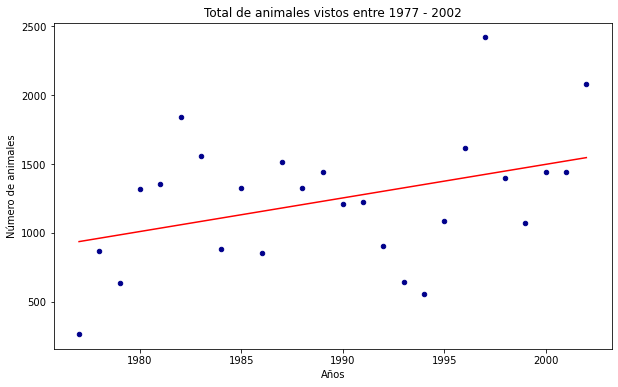

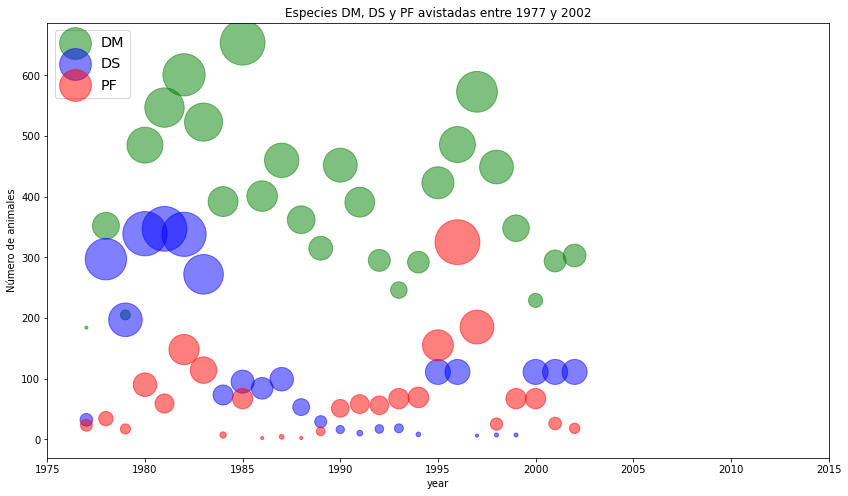

In [16]:
#grafico de dispersion
df_g5_di = df[['year','species_id']]
df_g5_di = df_g5_di.value_counts().groupby('year',axis=0).sum().to_frame()
df_g5_di.columns = ['Total']
df_g5_di.reset_index(inplace=True)
df_g5_di.plot(kind='scatter', x='year', y='Total', figsize=(10, 6), color='darkblue')

plt.title('Total de animales vistos entre 1977 - 2002')
plt.xlabel('Años')
plt.ylabel('Número de animales')

x = df_g5_di['year']      # año en el eje x
y = df_g5_di['Total']     # total en el eje y
ajuste = np.polyfit(x, y, deg=1)

# trazar la línea del mejor ajuste
plt.plot(x, ajuste[0] * x + ajuste[1], color='red') # recordar que x son los años
plt.annotate('y={0:.0f} x + {1:.0f}'.format(ajuste[0], ajuste[1]), xy=(2000, 150000))

plt.show()

# imprimir la línea de mejor ajuste
'Número de Animales = {0:.0f} * Año + {1:.0f}'.format(ajuste[0], ajuste[1]) 

#grafico de burbujas

df_g3.reset_index(inplace=True)

# normalizar los datos de DM
norm_dm = (df_g3['DM'] - df_g3['DM'].min()) / (df_g3['DM'].max() - df_g3['DM'].min())
# normalizar los datos de DS
norm_ds = (df_g3['DS'] - df_g3['DS'].min()) / (df_g3['DS'].max() - df_g3['DS'].min())
# normalizar los datos de PF
norm_pf = (df_g3['PF'] - df_g3['PF'].min()) / (df_g3['PF'].max() - df_g3['PF'].min())

# DM
ax0 = df_g3.plot(kind='scatter',
                    x='year',
                    y='DM',
                    figsize=(14, 8),
                    alpha=0.5,  # transparencia
                    color='green',
                    s=norm_dm * 2000 + 10,  # pasa el peso 
                    xlim=(1975, 2015)
                    )

# DS
ax1 = df_g3.plot(kind='scatter',
                    x='year',
                    y='DS',
                    alpha=0.5,
                    color="blue",
                    s=norm_ds * 2000 + 10,
                    ax=ax0
                    )
# PF
ax1 = df_g3.plot(kind='scatter',
                    x='year',
                    y='PF',
                    alpha=0.5,
                    color="red",
                    s=norm_pf * 2000 + 10,
                    ax=ax0
                    )
ax0.set_ylabel('Número de animales')
ax0.set_title('Especies DM, DS y PF avistadas entre 1977 y 2002')
ax0.legend(['DM', 'DS','PF'], loc='upper left', fontsize='x-large')
